# 1. Enhanced Data Pre-Procesing 

**To improve Accuracy on prediction model, Proposed stategy on Data prosesing is needed**.

# 2. importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn import metrics
from scipy import sparse

# 3. Loading Dataset

In [3]:
## 3.1 Load Dataset bffrs
#df_brfss = pd.read_csv('E:/AI_Project/2. PhD_Dzaki_BRFSS/Fix_Model_HP/1. EDNNModel/Code/data_clean_good_v1.csv')
df_brfss = pd.read_csv ('/Users/user/Library/CloudStorage/GoogleDrive-nurrachmandzakiyullah@gmail.com/My Drive/22. Colab Notebooks/1. AI_Project/2. PhD_Dzaki_BRFSS/Fix_Model_HP/3. Fix Model/0. EDPMLC_MAC/4.Final_dataset_Diabetes_Complication.csv')
df_brfss.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,Y1,Y2,Y3,Y4,Y5,Y6,Y7
0,3,1,1,1,1,1,1,1,3,1,...,1,3,1,2,2,1,2,2,1,2
1,5,3,1,1,2,4,2,1,5,1,...,1,2,2,2,2,2,2,2,1,1
2,4,1,1,1,2,1,2,2,2,2,...,2,3,1,2,2,2,2,2,2,1
3,4,1,1,1,2,4,2,1,1,1,...,2,3,2,2,2,2,1,2,1,2
4,2,1,1,3,1,3,1,1,1,1,...,1,3,1,2,2,2,2,2,2,2


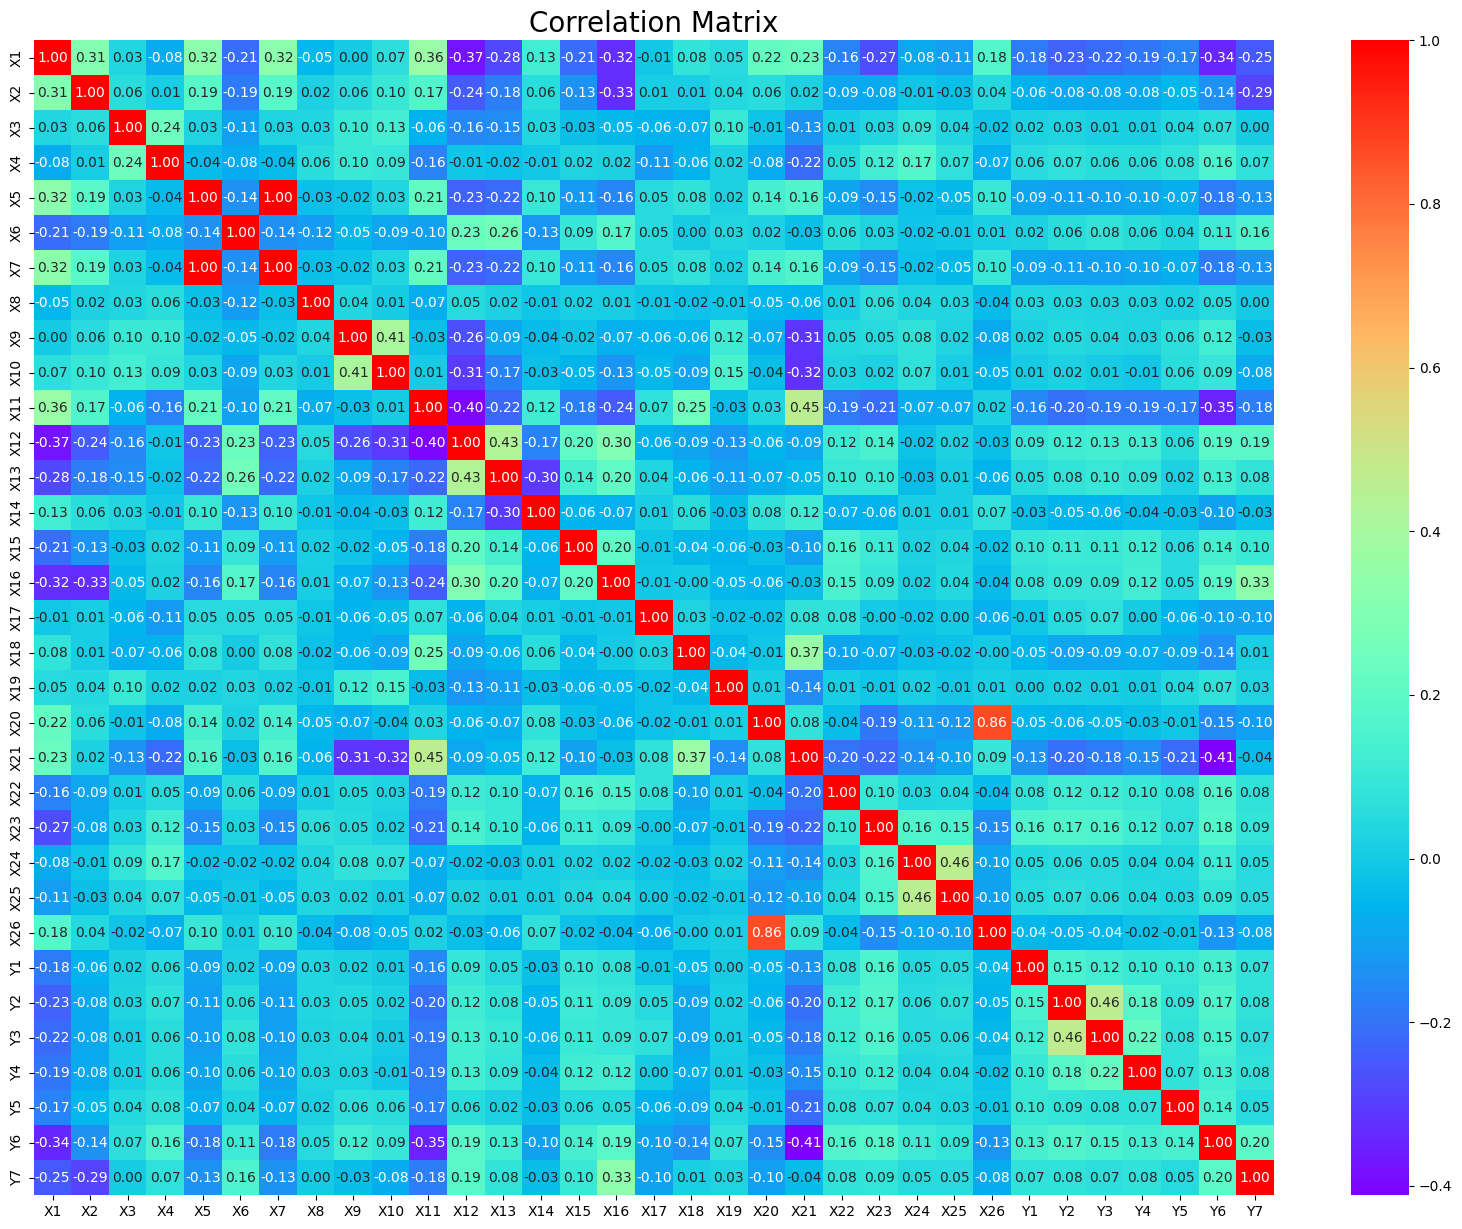

In [4]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df_brfss.corr(), annot=True, fmt=".2f", ax=ax, cmap = "rainbow" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [5]:
# mean
import statistics

statistics.mean(df_brfss.X1)

2.776876496081632

In [6]:
#Median
import statistics
statistics.median(df_brfss.X1)

3.0

In [10]:
#Modus
import statistics
statistics.mode(df_brfss.X1)

3

In [14]:
#Quartiles
#np.percentile(df_brfss.X1,25)
#np.percentile(df_brfss.X1,50)
np.percentile(df_brfss.X1,75)

4.0

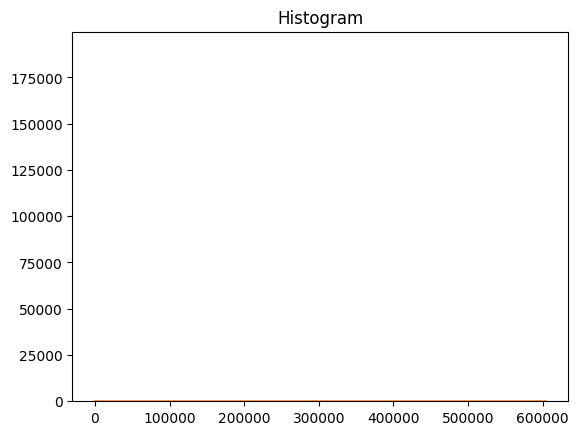

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.hist(df_brfss.X1)
plt.title("Histogram")
std = np.std(df_brfss.X1)
mean = np.mean(df_brfss.X1)
plt.plot(norm.pdf(df_brfss.X1,mean,std))
plt.show()

In [7]:
#Variance
np.var(df_brfss)

X1     1.224776
X2     0.614895
X3     0.072920
X4     0.722224
X5     0.191706
X6     1.093466
X7     0.191706
X8     0.073401
X9     3.135972
X10    0.350655
X11    8.120876
X12    5.292769
X13    0.877747
X14    1.073678
X15    0.061891
X16    0.163039
X17    0.236843
X18    0.072757
X19    4.548030
X20    0.730954
X21    0.640940
X22    0.074852
X23    0.505213
X24    0.138364
X25    0.320504
X26    0.217064
Y1     0.041680
Y2     0.055366
Y3     0.051571
Y4     0.043700
Y5     0.083544
Y6     0.230948
Y7     0.240532
dtype: float64

In [8]:
#Covariance (error)
#Split dataset into X and Y
x = df_brfss.iloc[:,:26]
y = df_brfss.iloc[:,26:]-1

#np.cov (x) 

In [9]:
df_brfss.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,Y1,Y2,Y3,Y4,Y5,Y6,Y7
count,604078.000000,604078.000000,604078.000000,604078.000000,604078.000000,604078.000000,604078.000000,604078.000000,604078.000000,604078.000000,...,604078.000000,604078.000000,604078.000000,604078.000000,604078.000000,604078.000000,604078.000000,604078.00000,604078.000000,604078.000000
mean,2.776876,1.519481,1.079192,1.429059,1.258558,3.219766,1.258558,1.079763,2.533256,1.420661,...,1.165881,2.287095,1.681483,1.956421,1.941173,1.945454,1.954203,1.90799,1.638029,1.597304
std,1.106697,0.784153,0.270038,0.849838,0.437842,1.045690,0.437842,0.270926,1.770869,0.592162,...,0.371974,0.566131,0.465902,0.204156,0.235301,0.227092,0.209045,0.28904,0.480571,0.490441
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,1.000000
50%,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
75%,4.000000,2.000000,1.000000,1.000000,2.000000,4.000000,2.000000,1.000000,5.000000,2.000000,...,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
max,5.000000,3.000000,2.000000,4.000000,2.000000,4.000000,2.000000,2.000000,6.000000,3.000000,...,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000


Text(0.5, 1.0, 'Computed Smoking Status')

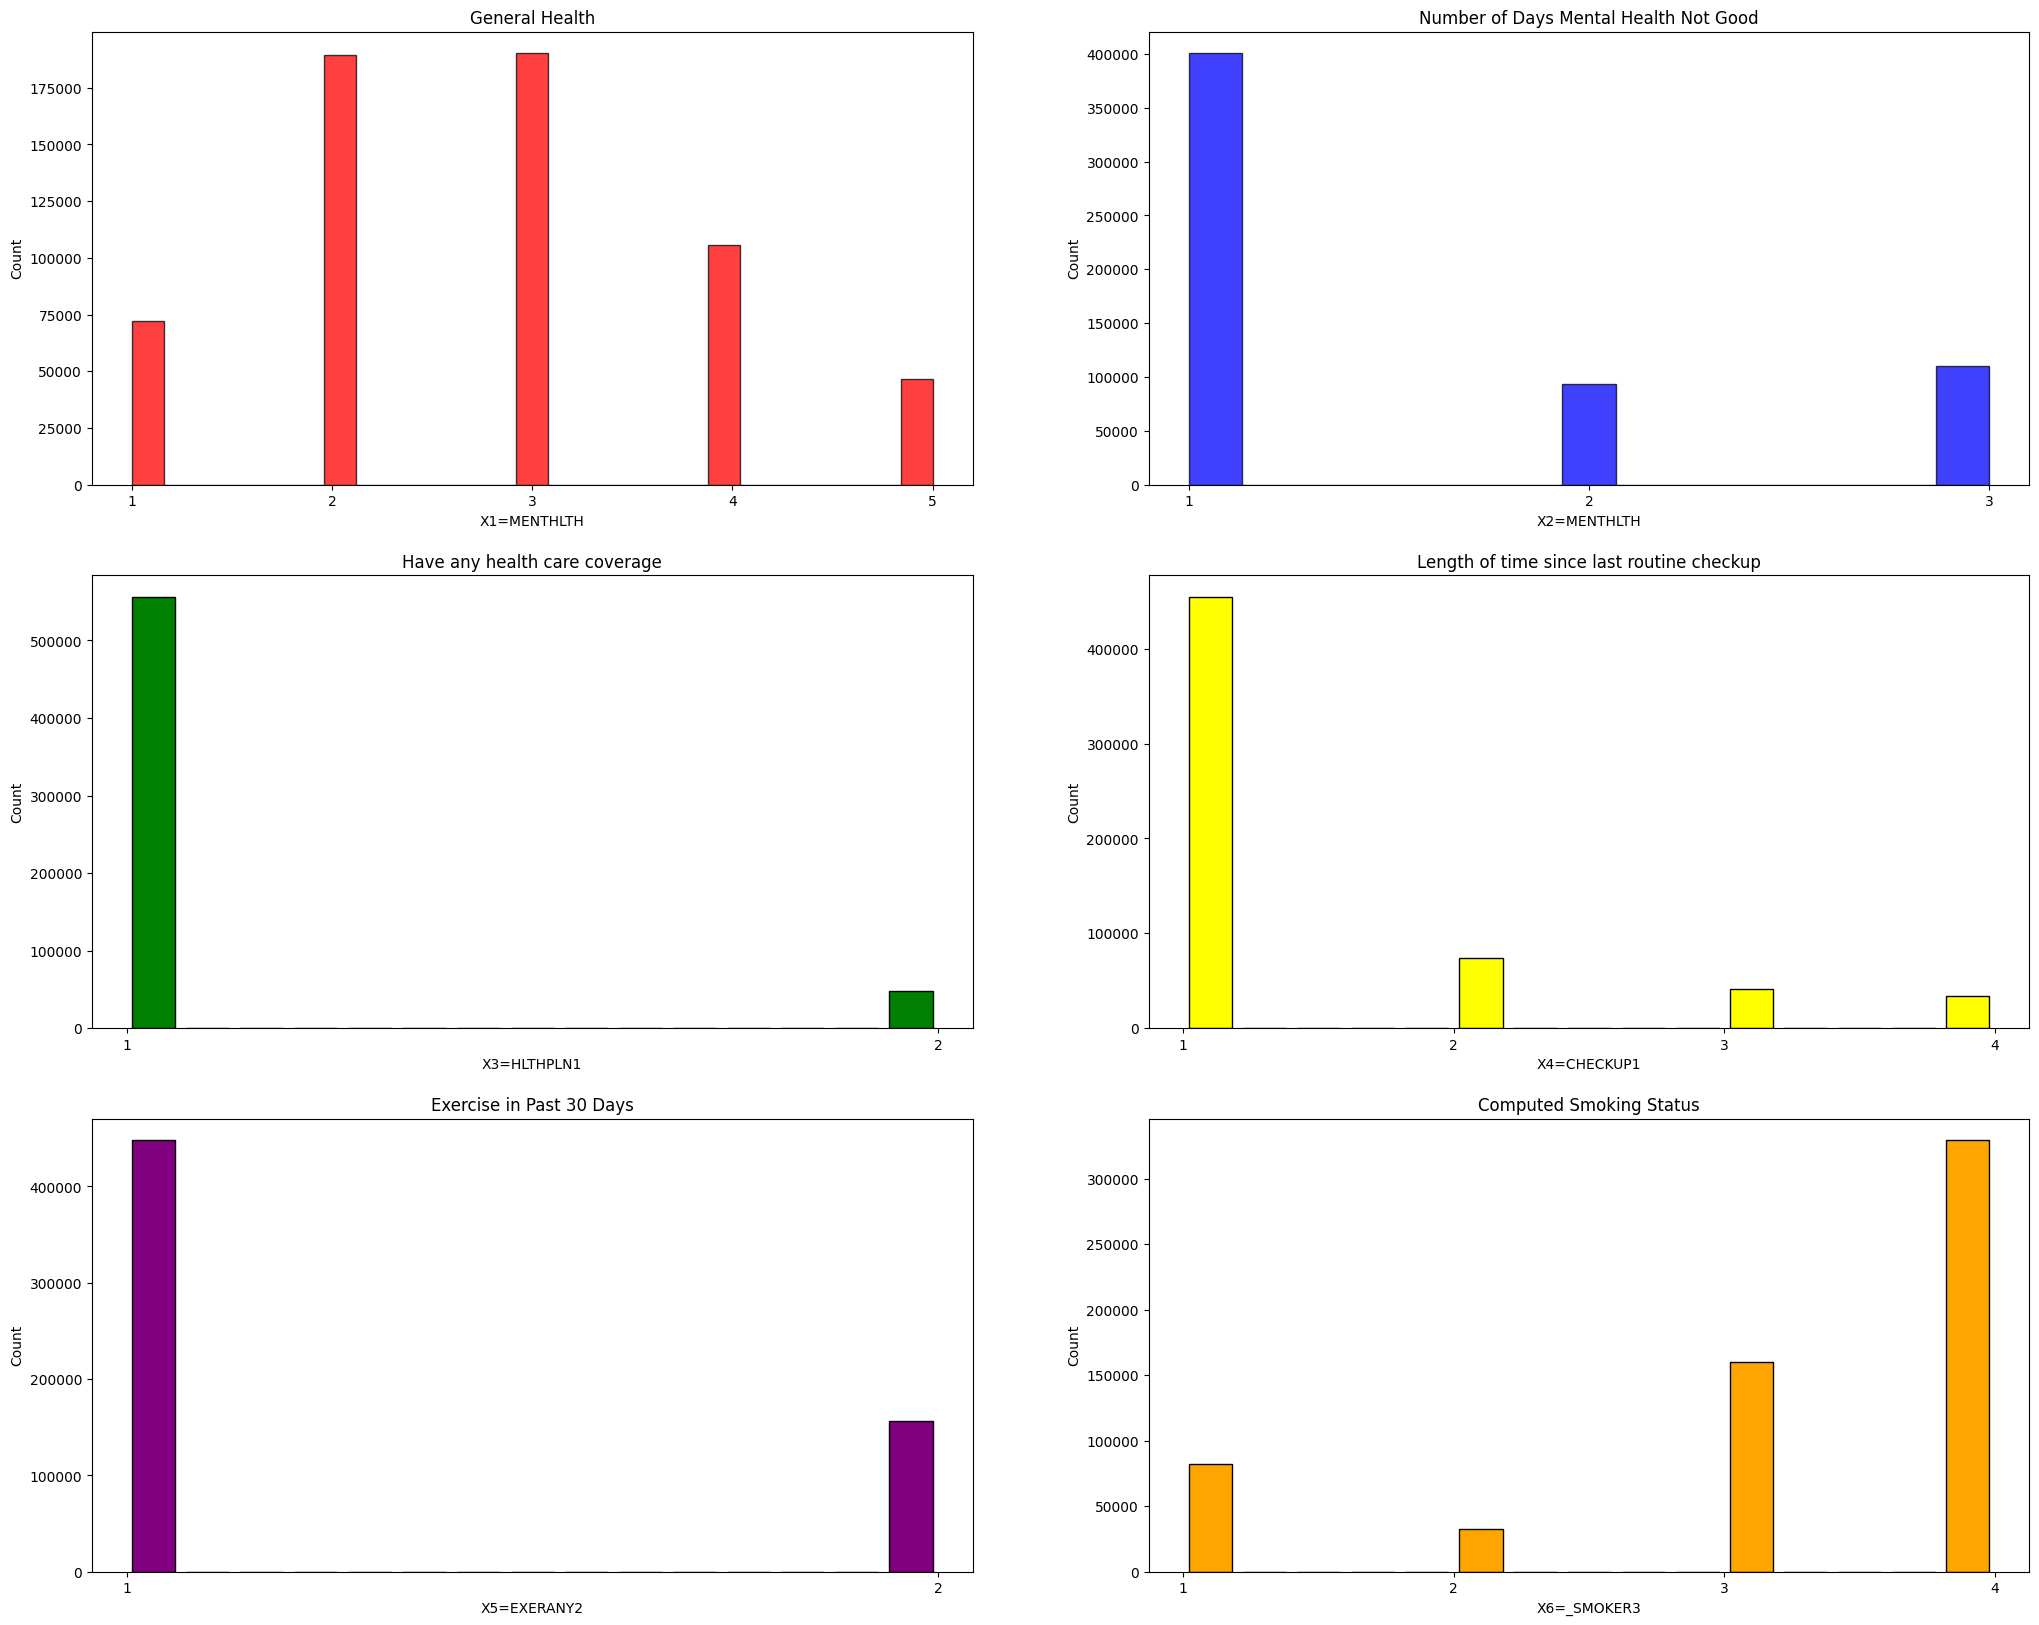

In [17]:
#Ploting Variable X1-X6
plt.figure(figsize=(25, 20))
plt.subplot(3,2,1)
plt.locator_params(integer=True)
plt.hist(df_brfss.X1, edgecolor='black', bins=25, color='red', rwidth=1, alpha=0.75)
#plt.grid(linestyle='--', linewidth=3, axis='y', alpha=0.5)
plt.xlabel('X1=MENTHLTH')
plt.ylabel("Count")
plt.title('General Health')

plt.subplot(3,2,2)
plt.locator_params(integer=True)
plt.hist(df_brfss.X2, edgecolor='black', bins=15, color='blue', rwidth=1, alpha=0.75)
plt.xlabel('X2=MENTHLTH')
plt.ylabel("Count")
plt.title('Number of Days Mental Health Not Good')

plt.subplot(3,2,3)
plt.locator_params(integer=True)
plt.hist(df_brfss.X3, edgecolor='black', bins=15, color='green', rwidth=0.8)
plt.xlabel('X3=HLTHPLN1')
plt.ylabel("Count")
plt.title('Have any health care coverage')

plt.subplot(3,2,4)
plt.locator_params(integer=True)
plt.hist(df_brfss.X4, edgecolor='black', bins=15, color='yellow', rwidth=0.8)
plt.xlabel('X4=CHECKUP1')
plt.ylabel("Count")
plt.title('Length of time since last routine checkup')

plt.subplot(3,2,5)
plt.locator_params(integer=True)
plt.hist(df_brfss.X5, edgecolor='black', bins=15, color='purple', rwidth=0.8)
plt.xlabel('X5=EXERANY2')
plt.ylabel("Count")
plt.title('Exercise in Past 30 Days')

plt.subplot(3,2,6)
plt.locator_params(integer=True)
plt.hist(df_brfss.X6, edgecolor='black', bins=15, color='orange', rwidth=0.8)
plt.xlabel('X6=_SMOKER3')
plt.ylabel("Count")
plt.title('Computed Smoking Status')


Text(0.5, 1.0, 'Computed Smoking Status')

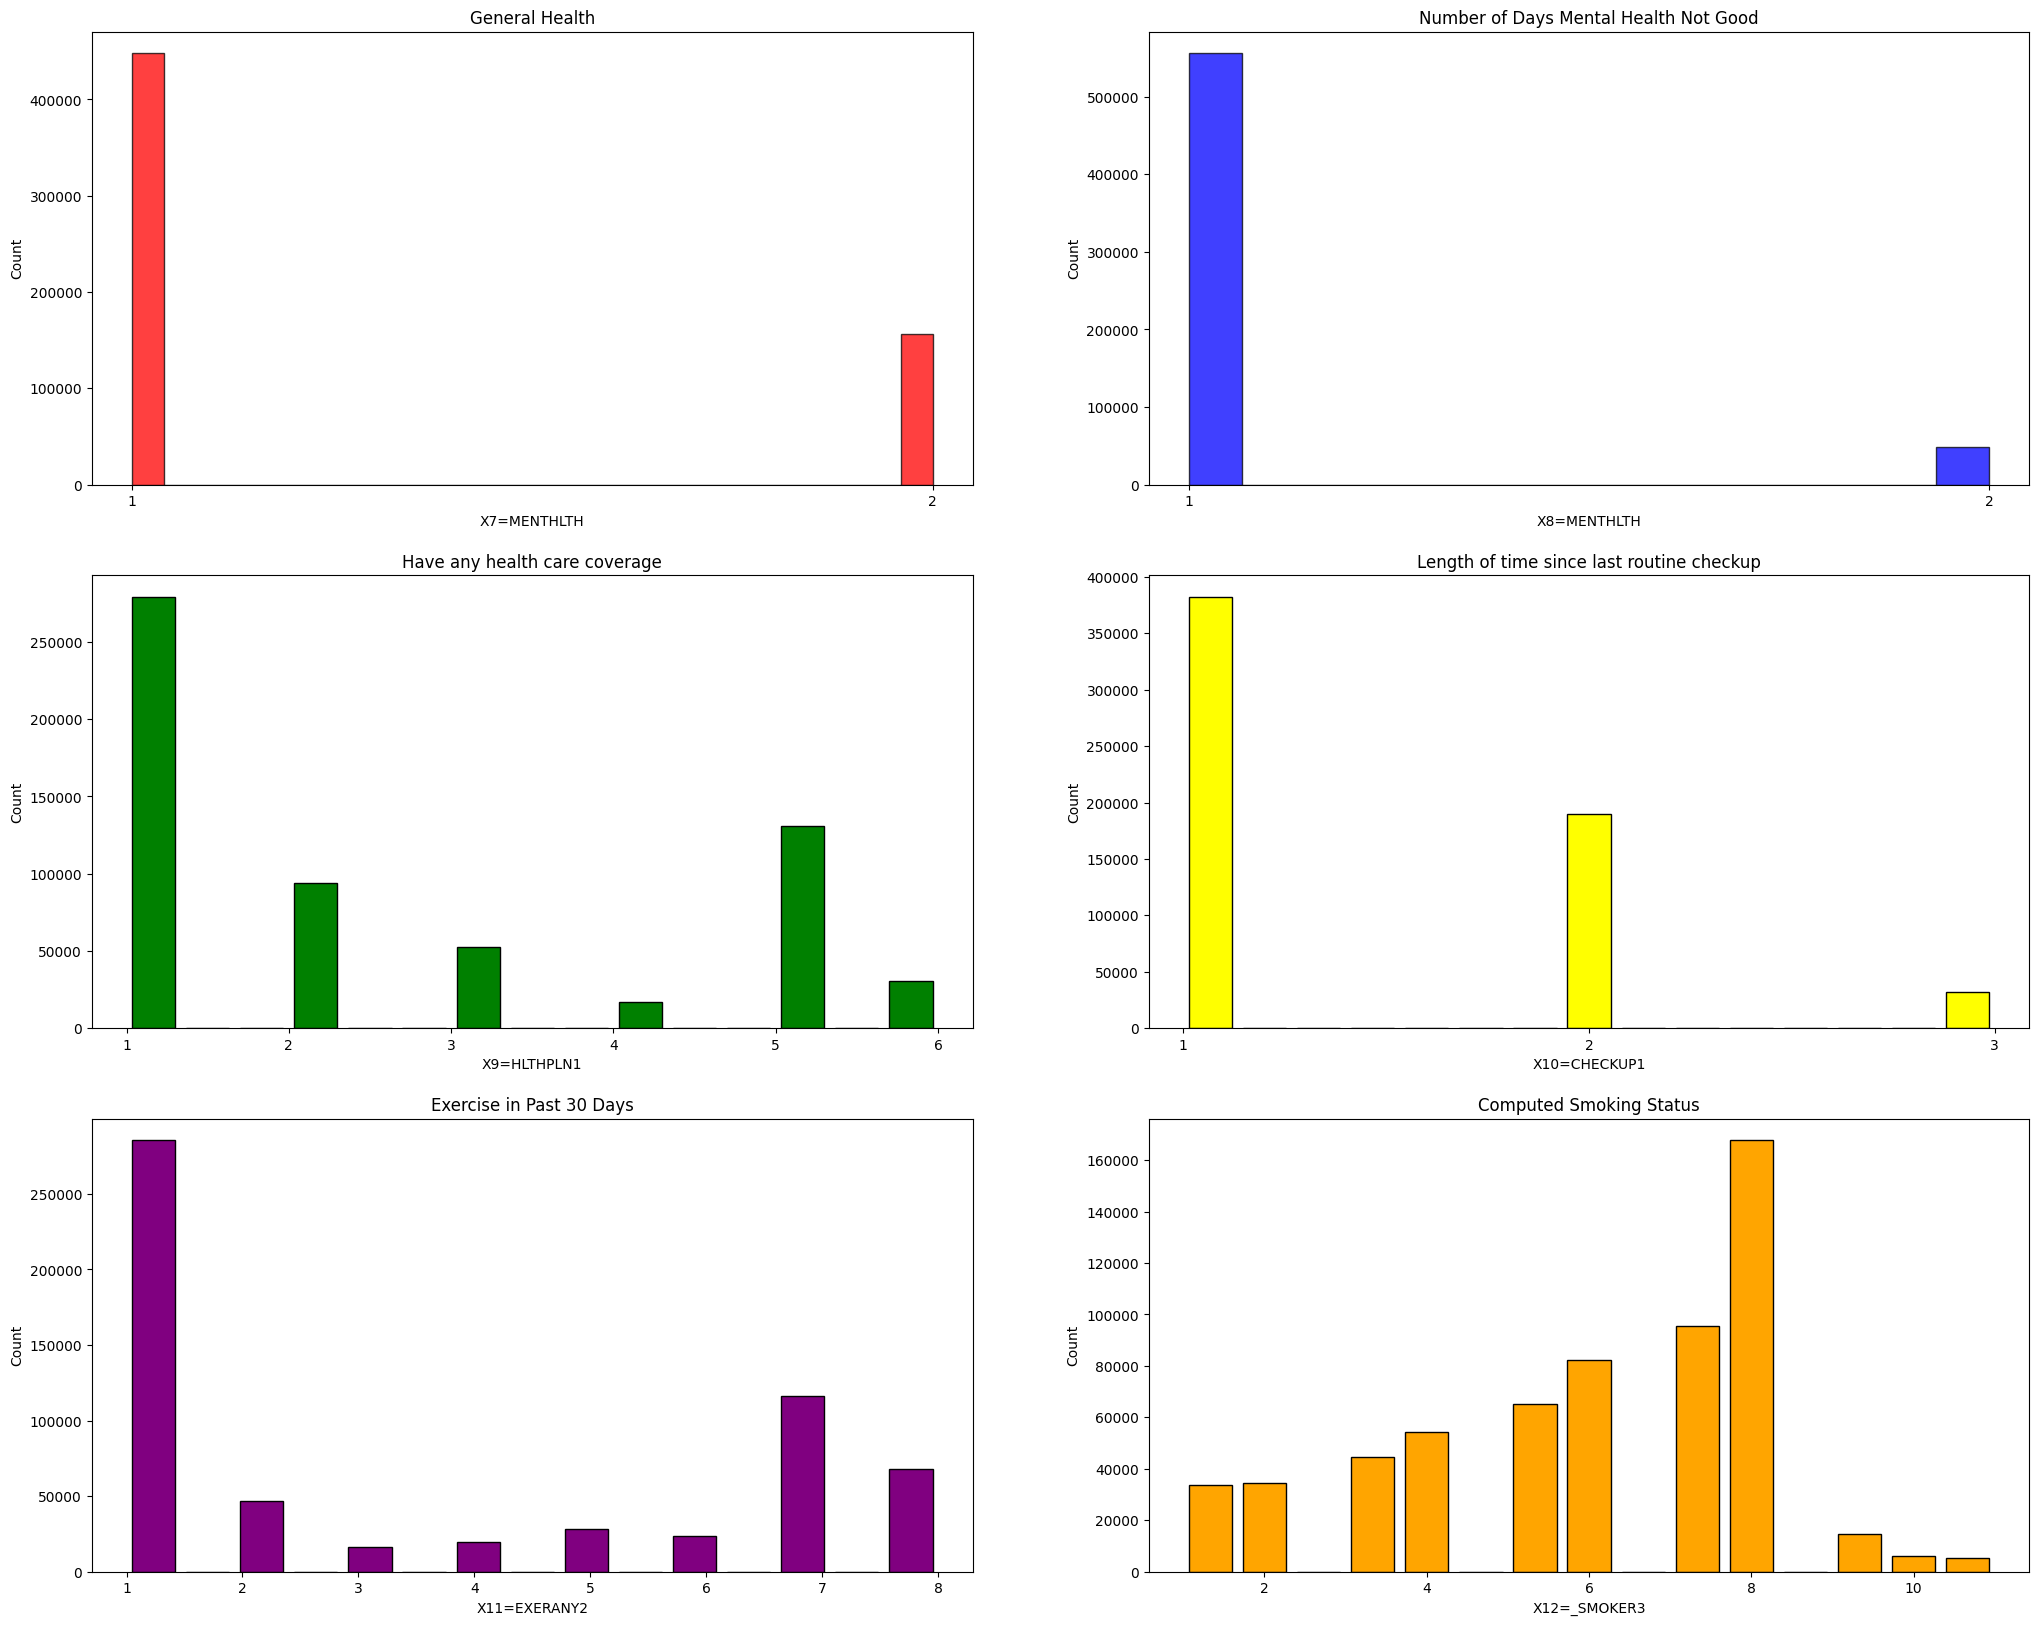

In [18]:
#Ploting Variable X7-X12
plt.figure(figsize=(25, 20))
plt.subplot(3,2,1)
plt.locator_params(integer=True)
plt.hist(df_brfss.X7, edgecolor='black', bins=25, color='red', rwidth=1, alpha=0.75)
#plt.grid(linestyle='--', linewidth=3, axis='y', alpha=0.5)
plt.xlabel('X7=MENTHLTH')
plt.ylabel("Count")
plt.title('General Health')

plt.subplot(3,2,2)
plt.locator_params(integer=True)
plt.hist(df_brfss.X8, edgecolor='black', bins=15, color='blue', rwidth=1, alpha=0.75)
plt.xlabel('X8=MENTHLTH')
plt.ylabel("Count")
plt.title('Number of Days Mental Health Not Good')

plt.subplot(3,2,3)
plt.locator_params(integer=True)
plt.hist(df_brfss.X9, edgecolor='black', bins=15, color='green', rwidth=0.8)
plt.xlabel('X9=HLTHPLN1')
plt.ylabel("Count")
plt.title('Have any health care coverage')

plt.subplot(3,2,4)
plt.locator_params(integer=True)
plt.hist(df_brfss.X10, edgecolor='black', bins=15, color='yellow', rwidth=0.8)
plt.xlabel('X10=CHECKUP1')
plt.ylabel("Count")
plt.title('Length of time since last routine checkup')

plt.subplot(3,2,5)
plt.locator_params(integer=True)
plt.hist(df_brfss.X11, edgecolor='black', bins=15, color='purple', rwidth=0.8)
plt.xlabel('X11=EXERANY2')
plt.ylabel("Count")
plt.title('Exercise in Past 30 Days')

plt.subplot(3,2,6)
plt.locator_params(integer=True)
plt.hist(df_brfss.X12, edgecolor='black', bins=15, color='orange', rwidth=0.8)
plt.xlabel('X12=_SMOKER3')
plt.ylabel("Count")
plt.title('Computed Smoking Status')


Text(0.5, 1.0, 'Computed Smoking Status')

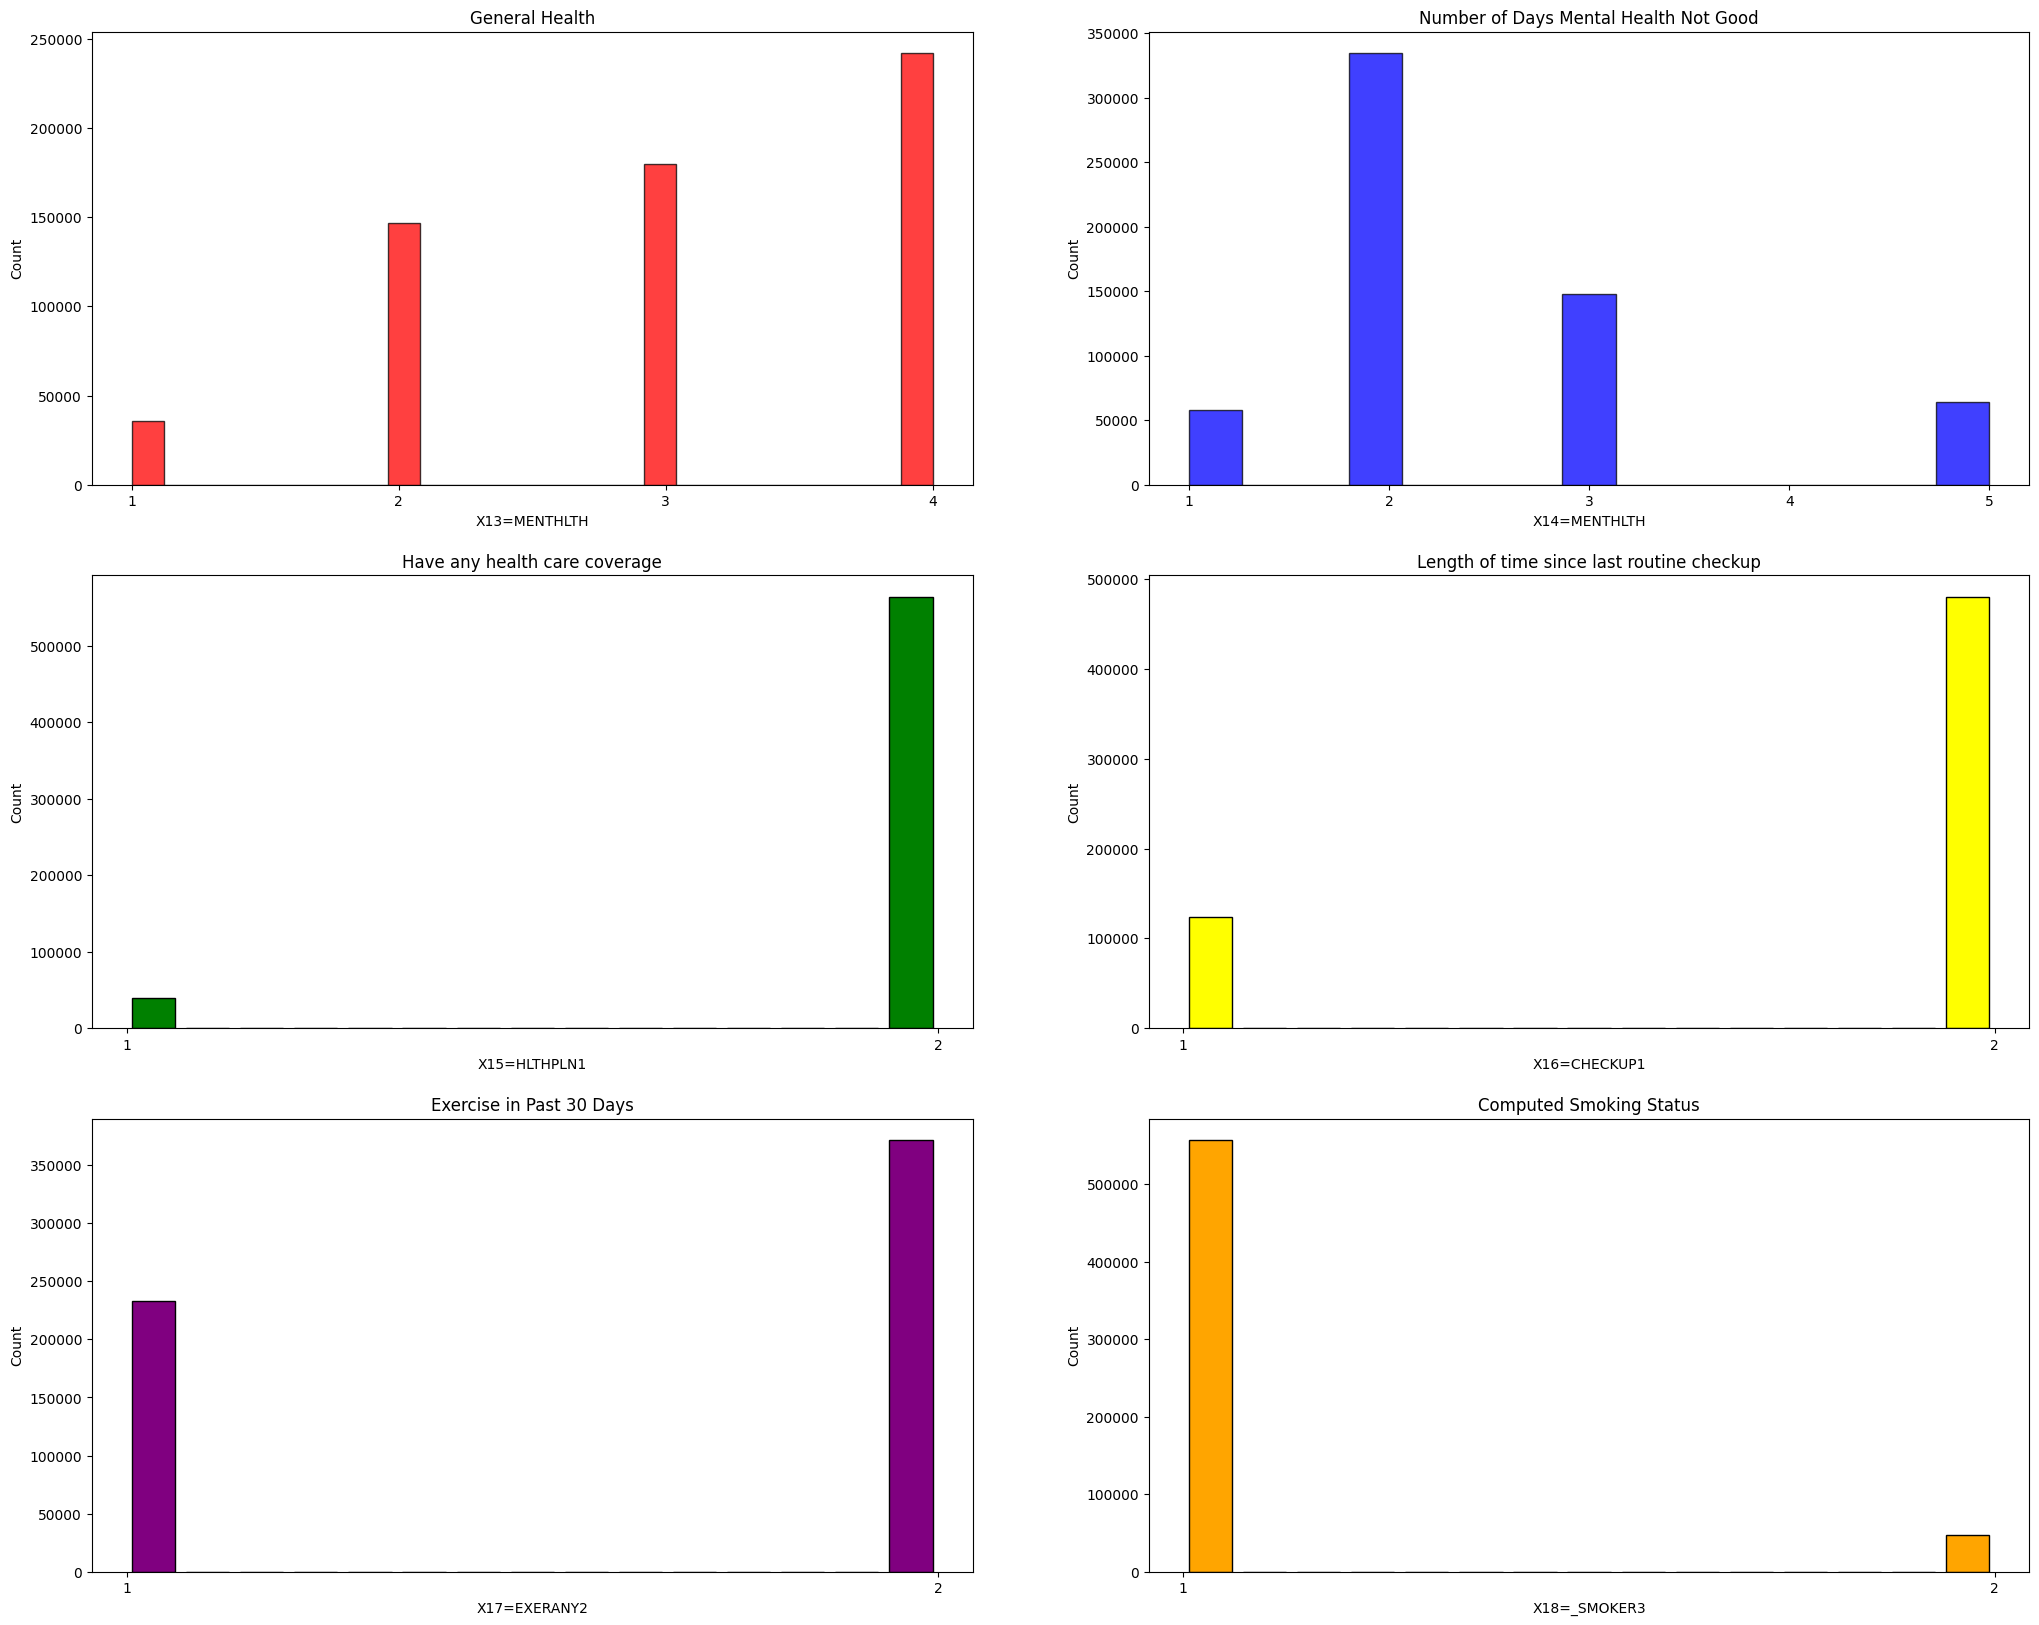

In [19]:
#Ploting Variable X13-X18
plt.figure(figsize=(25, 20))
plt.subplot(3,2,1)
plt.locator_params(integer=True)
plt.hist(df_brfss.X13, edgecolor='black', bins=25, color='red', rwidth=1, alpha=0.75)
#plt.grid(linestyle='--', linewidth=3, axis='y', alpha=0.5)
plt.xlabel('X13=MENTHLTH')
plt.ylabel("Count")
plt.title('General Health')

plt.subplot(3,2,2)
plt.locator_params(integer=True)
plt.hist(df_brfss.X14, edgecolor='black', bins=15, color='blue', rwidth=1, alpha=0.75)
plt.xlabel('X14=MENTHLTH')
plt.ylabel("Count")
plt.title('Number of Days Mental Health Not Good')

plt.subplot(3,2,3)
plt.locator_params(integer=True)
plt.hist(df_brfss.X15, edgecolor='black', bins=15, color='green', rwidth=0.8)
plt.xlabel('X15=HLTHPLN1')
plt.ylabel("Count")
plt.title('Have any health care coverage')

plt.subplot(3,2,4)
plt.locator_params(integer=True)
plt.hist(df_brfss.X16, edgecolor='black', bins=15, color='yellow', rwidth=0.8)
plt.xlabel('X16=CHECKUP1')
plt.ylabel("Count")
plt.title('Length of time since last routine checkup')

plt.subplot(3,2,5)
plt.locator_params(integer=True)
plt.hist(df_brfss.X17, edgecolor='black', bins=15, color='purple', rwidth=0.8)
plt.xlabel('X17=EXERANY2')
plt.ylabel("Count")
plt.title('Exercise in Past 30 Days')

plt.subplot(3,2,6)
plt.locator_params(integer=True)
plt.hist(df_brfss.X18, edgecolor='black', bins=15, color='orange', rwidth=0.8)
plt.xlabel('X18=_SMOKER3')
plt.ylabel("Count")
plt.title('Computed Smoking Status')


Text(0.5, 1.0, 'Computed Smoking Status')

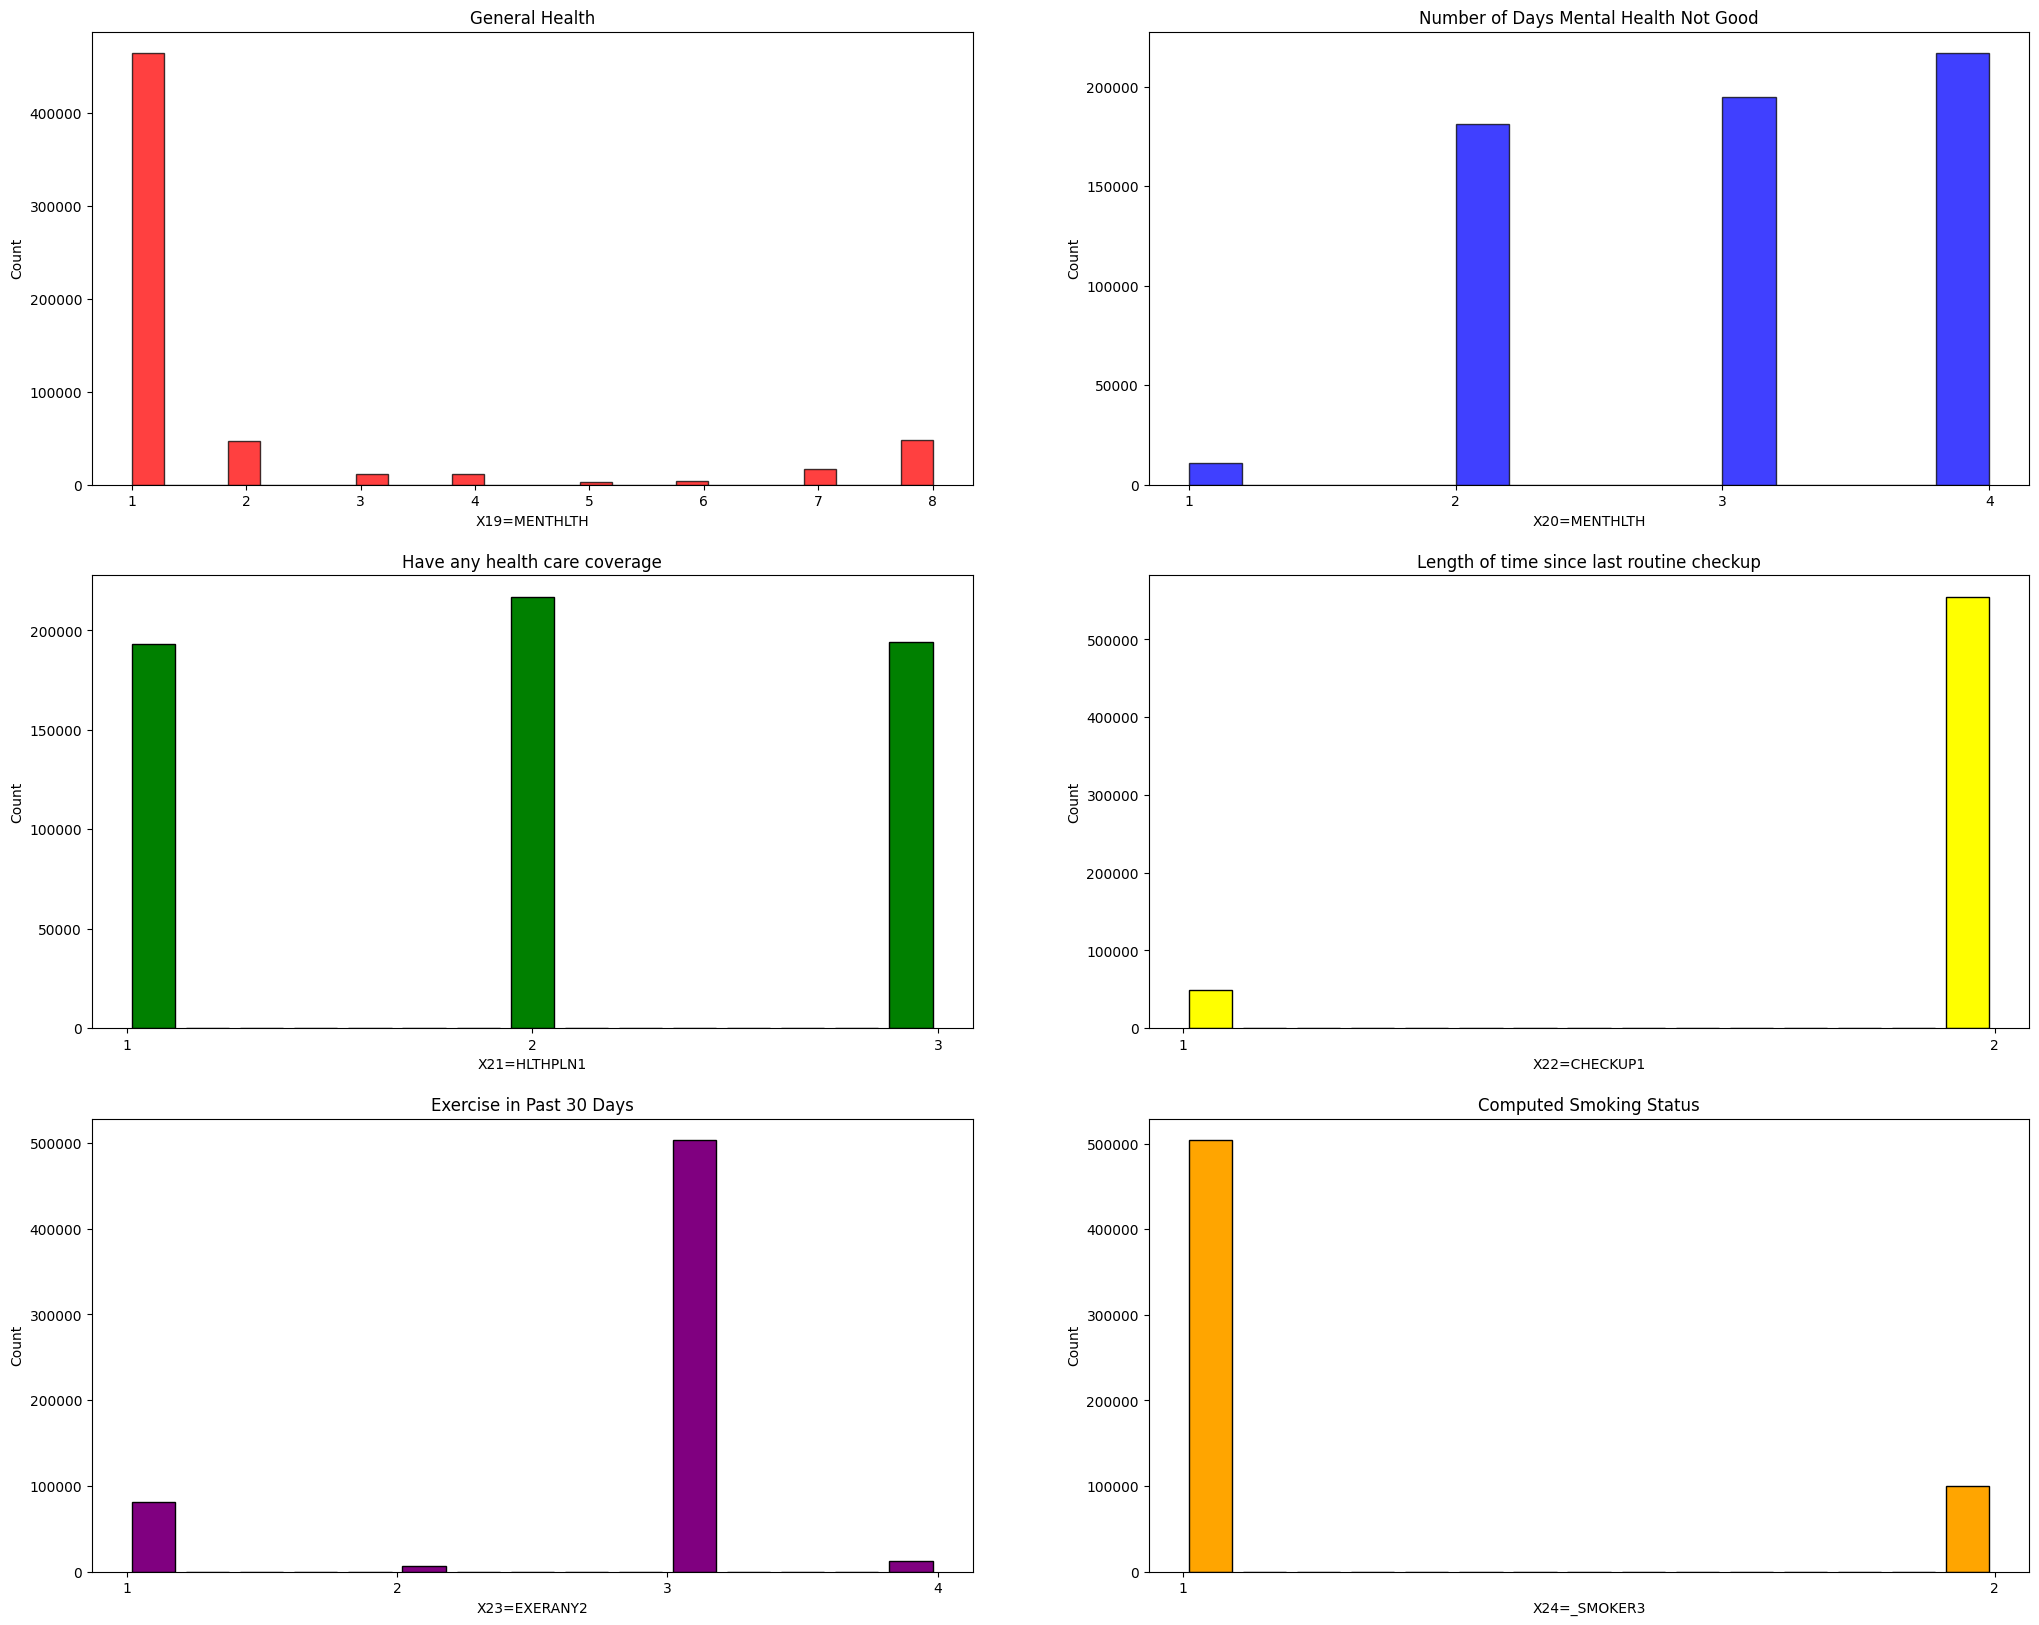

In [20]:
#Ploting Variable X19-X24
plt.figure(figsize=(25, 20))
plt.subplot(3,2,1)
plt.locator_params(integer=True)
plt.hist(df_brfss.X19, edgecolor='black', bins=25, color='red', rwidth=1, alpha=0.75)
#plt.grid(linestyle='--', linewidth=3, axis='y', alpha=0.5)
plt.xlabel('X19=MENTHLTH')
plt.ylabel("Count")
plt.title('General Health')

plt.subplot(3,2,2)
plt.locator_params(integer=True)
plt.hist(df_brfss.X20, edgecolor='black', bins=15, color='blue', rwidth=1, alpha=0.75)
plt.xlabel('X20=MENTHLTH')
plt.ylabel("Count")
plt.title('Number of Days Mental Health Not Good')

plt.subplot(3,2,3)
plt.locator_params(integer=True)
plt.hist(df_brfss.X21, edgecolor='black', bins=15, color='green', rwidth=0.8)
plt.xlabel('X21=HLTHPLN1')
plt.ylabel("Count")
plt.title('Have any health care coverage')

plt.subplot(3,2,4)
plt.locator_params(integer=True)
plt.hist(df_brfss.X22, edgecolor='black', bins=15, color='yellow', rwidth=0.8)
plt.xlabel('X22=CHECKUP1')
plt.ylabel("Count")
plt.title('Length of time since last routine checkup')

plt.subplot(3,2,5)
plt.locator_params(integer=True)
plt.hist(df_brfss.X23, edgecolor='black', bins=15, color='purple', rwidth=0.8)
plt.xlabel('X23=EXERANY2')
plt.ylabel("Count")
plt.title('Exercise in Past 30 Days')

plt.subplot(3,2,6)
plt.locator_params(integer=True)
plt.hist(df_brfss.X24, edgecolor='black', bins=15, color='orange', rwidth=0.8)
plt.xlabel('X24=_SMOKER3')
plt.ylabel("Count")
plt.title('Computed Smoking Status')


Text(0.5, 1.0, 'Number of Days Mental Health Not Good')

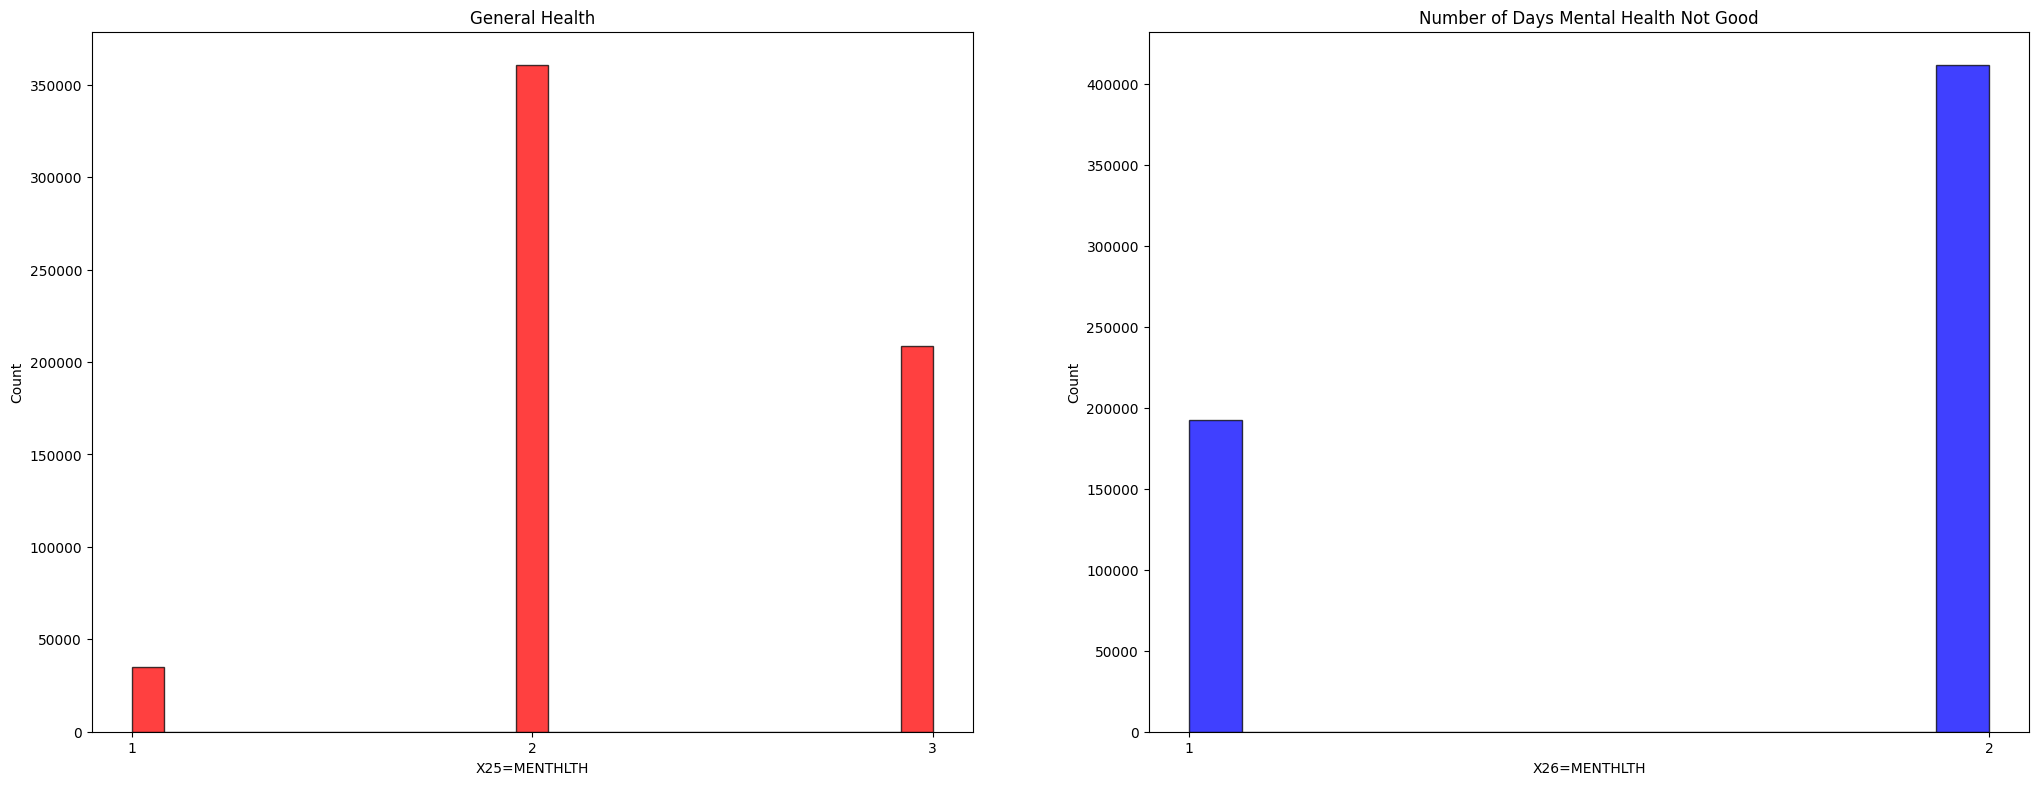

In [21]:
#Ploting Variable X25-X26
plt.figure(figsize=(25, 20))
plt.subplot(2,2,1)
plt.locator_params(integer=True)
plt.hist(df_brfss.X25, edgecolor='black', bins=25, color='red', rwidth=1, alpha=0.75)
#plt.grid(linestyle='--', linewidth=3, axis='y', alpha=0.5)
plt.xlabel('X25=MENTHLTH')
plt.ylabel("Count")
plt.title('General Health')

plt.subplot(2,2,2)
plt.locator_params(integer=True)
plt.hist(df_brfss.X26, edgecolor='black', bins=15, color='blue', rwidth=1, alpha=0.75)
plt.xlabel('X26=MENTHLTH')
plt.ylabel("Count")
plt.title('Number of Days Mental Health Not Good')


Text(0.5, 1.0, 'Computed Smoking Status')

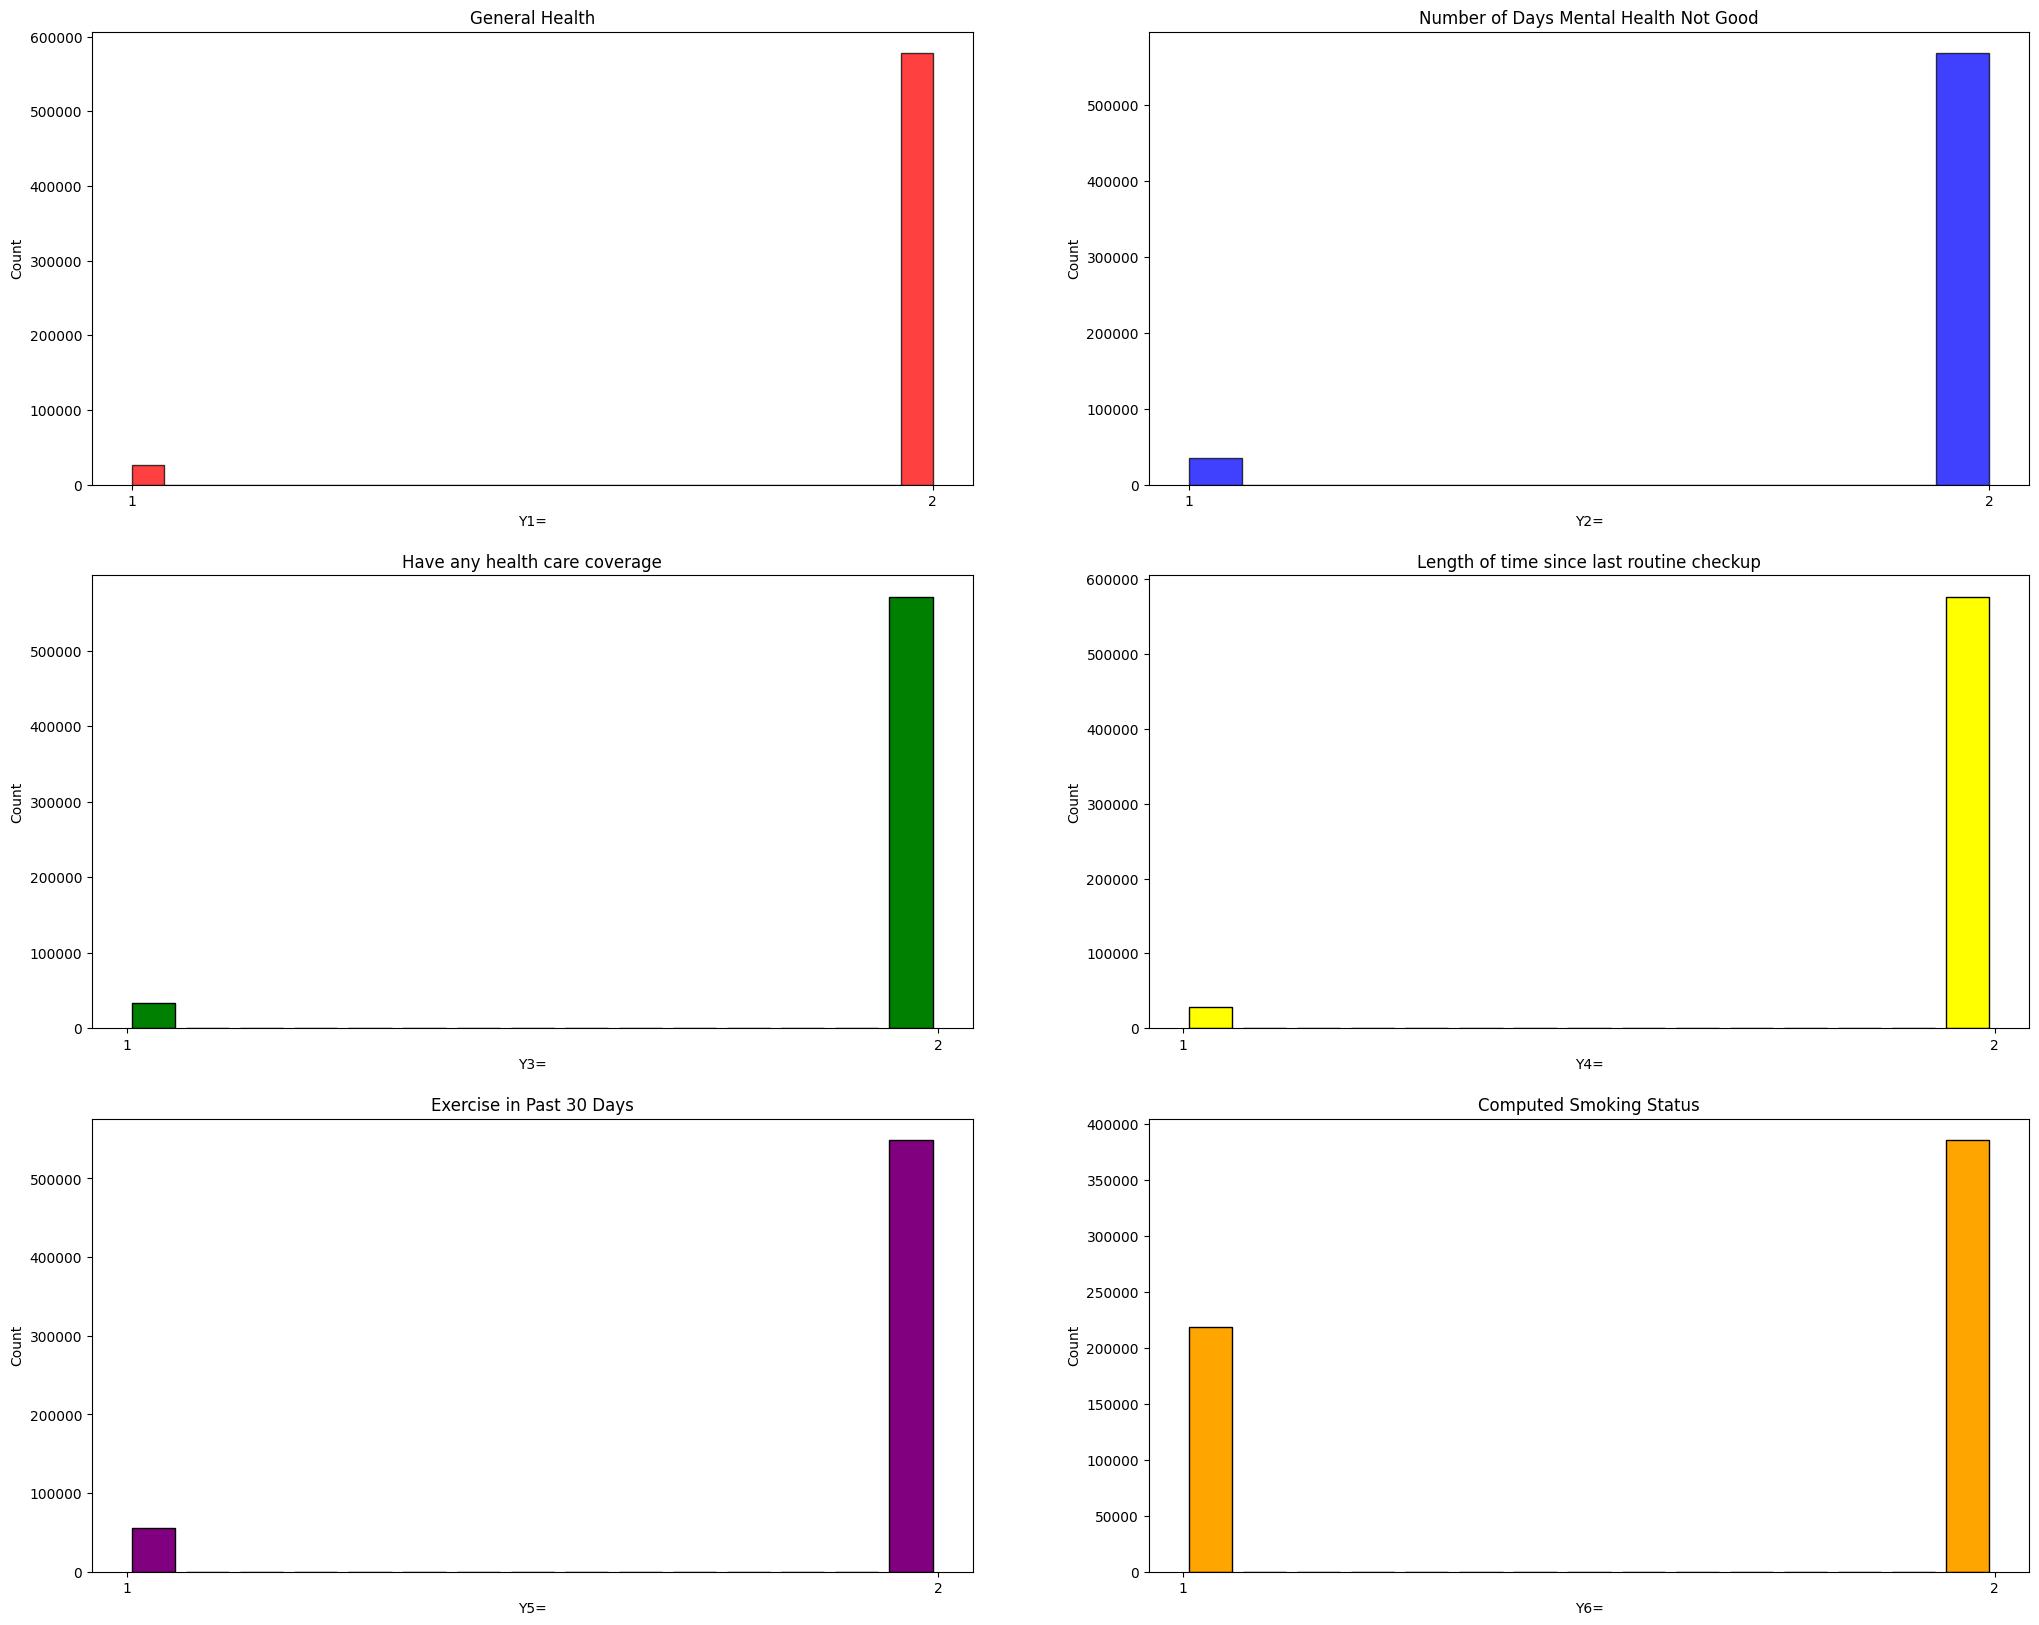

In [22]:
#Ploting Variable Y1-Y7
plt.figure(figsize=(25, 20))
plt.subplot(3,2,1)
plt.locator_params(integer=True)
plt.hist(df_brfss.Y1, edgecolor='black', bins=25, color='red', rwidth=1, alpha=0.75)
#plt.grid(linestyle='--', linewidth=3, axis='y', alpha=0.5)
plt.xlabel('Y1=')
plt.ylabel("Count")
plt.title('General Health')

plt.subplot(3,2,2)
plt.locator_params(integer=True)
plt.hist(df_brfss.Y2, edgecolor='black', bins=15, color='blue', rwidth=1, alpha=0.75)
plt.xlabel('Y2=')
plt.ylabel("Count")
plt.title('Number of Days Mental Health Not Good')

plt.subplot(3,2,3)
plt.locator_params(integer=True)
plt.hist(df_brfss.Y3, edgecolor='black', bins=15, color='green', rwidth=0.8)
plt.xlabel('Y3=')
plt.ylabel("Count")
plt.title('Have any health care coverage')

plt.subplot(3,2,4)
plt.locator_params(integer=True)
plt.hist(df_brfss.Y4, edgecolor='black', bins=15, color='yellow', rwidth=0.8)
plt.xlabel('Y4=')
plt.ylabel("Count")
plt.title('Length of time since last routine checkup')

plt.subplot(3,2,5)
plt.locator_params(integer=True)
plt.hist(df_brfss.Y5, edgecolor='black', bins=15, color='purple', rwidth=0.8)
plt.xlabel('Y5=')
plt.ylabel("Count")
plt.title('Exercise in Past 30 Days')

plt.subplot(3,2,6)
plt.locator_params(integer=True)
plt.hist(df_brfss.Y6, edgecolor='black', bins=15, color='orange', rwidth=0.8)
plt.xlabel('Y6=')
plt.ylabel("Count")
plt.title('Computed Smoking Status')


Text(0.5, 1.0, 'Computed Smoking Status')

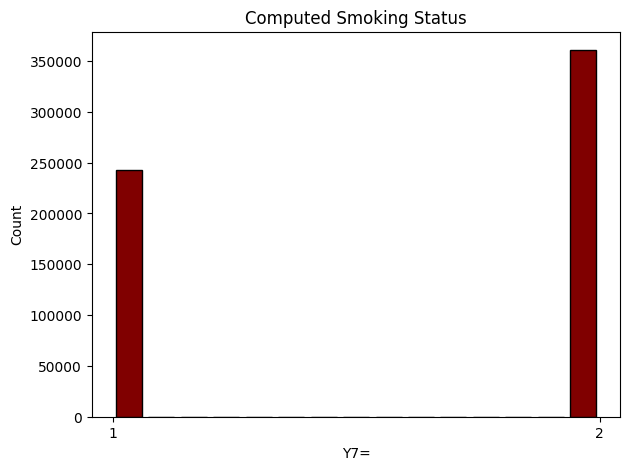

In [23]:
#Ploting Variable Y7
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.locator_params(integer=True)
plt.hist(df_brfss.Y7, edgecolor='black', bins=15, color='maroon', rwidth=0.8)
plt.xlabel('Y7=')
plt.ylabel("Count")
plt.title('Computed Smoking Status')

# 3.3 Data Transformation

